In [4]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

(190, 400, 4)


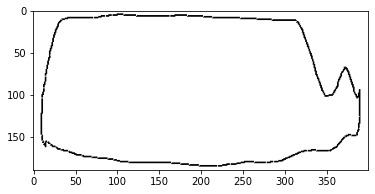

In [19]:
img_pathg='data/A0801_3.png'
png_image = cv2.imread(img_pathg, cv2.IMREAD_UNCHANGED)
print(png_image.shape)
plt.imshow(png_image)
plt.show()

## cv2.threshold 
```
cv2.threshold (src, thresh, maxval, type)

参数：

cv2.threshold (源图片, 阈值, 填充色, 阈值类型)
```

```
Args：
src：源图片，必须是单通道
thresh：阈值，取值范围0～255
maxval：填充色，取值范围0～255
type：阈值类型，具体见下表
```

In [32]:
origin_pic = 'data/A0801_3.png'
save_folder = 'data/generated_pics'

# 新建文件夹，用于存放新生成的阈值图片
import shutil
try:
    shutil.rmtree(save_folder)
except OSError:
    pass
import os
os.makedirs(save_folder)

# 读取待处理图片，并转换成单通道图片
import cv2
img = cv2.imread(origin_pic)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 对 cv2.threshold 的 type 参数进行 0~6 的实验
import numpy as np
for type in range(0, 5, 1):
    _, thresh = cv2.threshold(src=imgray, thresh=150, maxval=100, type=type)
    concat_pic = np.concatenate([imgray, thresh], axis=1)
    cv2.imwrite(save_folder+'/type={}.jpg'.format(type), concat_pic)

## cv2.findContours

找到轮廓

In [29]:
!ls data

00DF400A.wav
A0801_3.png
generated_pics
杞�寤�.png


(190, 400)


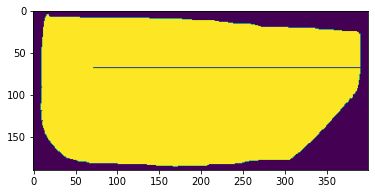

uint8


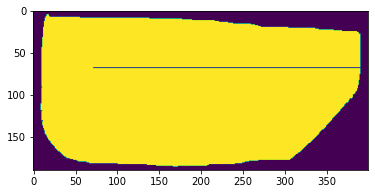

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


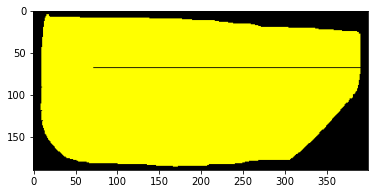

[array([[[16,  5]],
 
        [[16,  6]],
 
        [[15,  7]],
 
        ...,
 
        [[18,  6]],
 
        [[18,  5]],
 
        [[17,  5]]], dtype=int32)]

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)    #按键盘上任意键退出图片
    cv2.destroyAllWindows()

# f=cv2.imread('./data/lunkuo.png')
# f=cv2.imread('./data/A0801_3.jpg')
f=cv2.imread('./data/A1001_24.jpg')

# print(f)
img = cv2.cvtColor(f,cv2.COLOR_BGR2GRAY)
print(img.shape)
# cv_show('img',img)
plt.imshow(img)
plt.show()
print(img.dtype)
ret3,th3 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)#OTSU二值化
# cv_show('res3',th3)
plt.imshow(th3)
plt.show()
background1=np.zeros(f.shape)
contours4, hierarchy4 = cv2.findContours(th3,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
i=1
for c in contours4[0:]:
    i+=1
    draw_img4 = background1.copy()
    res4= cv2.drawContours(draw_img4, c,-1,(0, 1, 1),cv2.FILLED)
    res5=cv2.fillConvexPoly(res4, c, (255, 255, 0))
    path='data/'+str(i)+'a10.jpg'
    cv2.imwrite(path,res5)
#     cv_show('res5',res5)
    plt.imshow(res5)
    plt.show()

contours4

## cv2.fillConvexPoly

cv2.fillConvexPoly()函数，只能用来填充凸多边形。

只需要提供凸多边形的顶点即可。

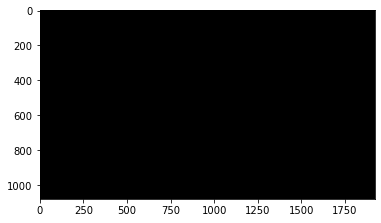

In [30]:
img = np.zeros((1080, 1920, 3), np.uint8)
plt.imshow(img)
plt.show()

`填充三角形`

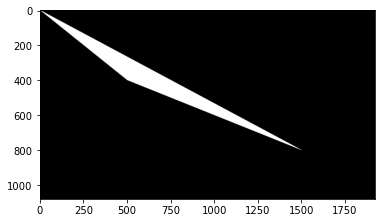

In [31]:
triangle = np.array([[0, 0], [1500, 800], [500, 400]]) #[0, 0], [1500, 800], [500, 400]为坐标定点
cv2.fillConvexPoly(img, triangle, (255, 255, 255))
plt.imshow(img)
plt.show()

## cv2.fillPoly
cv2.fillPoly()函数可以用来填充任意形状的图型，可以用来绘制多边形。也可以使用非常多个边来近似的画一条曲线。cv2.fillPoly()函数可以一次填充多个图型。

在刚开始使用cv2.fillPoly()时，会发现没有效果，只有轮廓线被染色了，内部却没有被填充。这是因为忘记了加中括号。

点构成的边界，要加中括号[  ]。见下面例子：

contours是一堆边界，往往是通过二值化操作、cv2.findContours方法找到的结果。这里近取出第1个边界数组来画

In [28]:
# cv2.fillPoly(img,[contours[1]],(255,0,0))  #填充内部
# cv2.fillPoly(img,contours[1],(255,0,0)) #只染色边界

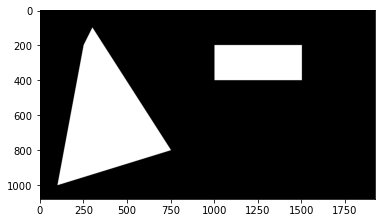

In [27]:
img = np.zeros((1080, 1920, 3), np.uint8)
area1 = np.array([[250, 200], [300, 100], [750, 800], [100, 1000]])
area2 = np.array([[1000, 200], [1500, 200], [1500, 400], [1000, 400]])
cv2.fillPoly(img, [area1, area2], (255, 255, 255))
plt.imshow(img)
plt.show()

## 参考资料
- [填充图像不规则区域](https://blog.csdn.net/lyxleft/article/details/90676451)
- [Image Thresholding](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html#image-thresholding)